# **Brasil** - 283525

### Analisis de datos de las importaciones del ultimo año, con especial enfasis en los ultimos 6 meses.

> Esto es un analisis exploratorio inicial del de las Importaciones de Brasil (01/2022 - 12/2022). Los datos fueron extraidos de Softrade el 20/01/2022 a las 18:00 hs.

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - ***


## Parte 1

#### Esto de abajo es una celda de codigo, que muestra el output abajo. Por ejemplo, aca levanto la bbdd e imprimo las primeras 5 columnas para ver si se cargo o no. Despues muestro informacion basica del "dataframe", que tiene X filas e Y columnas.


In [1]:
import pandas as pd
import numpy as np
import warnings
# from google.colab import drive

pd.options.display.max_columns = None
pd.options.display.max_rows = None

# !pwd
# !cd drive

# drive.mount('/content/drive')

warnings.simplefilter("ignore")

data_location = "./data/283525_Importaciones_01-12:2022.xlsx"

data = pd.read_excel(data_location, engine="openpyxl")

print("Este dataframe tiene (filas, col): \n",
      data.shape, "\n", "- - - - - - - - - -")

data.sample(1)


Este dataframe tiene (filas, col): 
 (147, 12) 
 - - - - - - - - - -


,Operación,Fecha,Código NCM,País de Origen,Puerto,Estado,Unitario FOB,U$S FOB,Cantidad Comercial,Unidad de Medida,Kgs. Brutos,Descripción de Mercadería
136,70732,12/2022,2835.25.00,China,PARANAGUA,PARANA-PR,0.67,1336512,1980800,QUILOGRAMA LIQUIDO,1980800,HIDROGENOORTOFOSFATO DE CALCIO O FOSFATO DICAL...


In [2]:
data_cols = [col for col in data.columns]

print("\033[1m" + "\nEsta bbdd tiene los siguientes datos: \n \n" +
      "\033[0m", data_cols, "\n \n- - - - - - - - - - - - - - - - -\n")



Esta bbdd tiene los siguientes datos: 
 
 ['Operación', 'Fecha', 'Código NCM', 'País de Origen', 'Puerto', 'Estado', 'Unitario FOB', 'U$S FOB', 'Cantidad Comercial', 'Unidad de Medida', 'Kgs. Brutos', 'Descripción de Mercadería'] 
 
- - - - - - - - - - - - - - - - -



Vamos a ver si estan todos los registros en todas las celdas, o si hay datos sin rellenar:

> Este metodo muchas veces puede salir mal porque a veces se rellenan los valores con n/a o cosas del estilo. Despues tambien reviso eso, no worries.


In [3]:
# Se ordenan jerarquicamente, en caso de haber alguno, aparece primero.
is_null_result = data.isnull().sum().sort_index()

print("\033[1m" + "\nCantidad de valores que faltan ser completados:\n \n" +
      "\033[0m", is_null_result)



Cantidad de valores que faltan ser completados:
 
 Cantidad Comercial           0
Código NCM                   0
Descripción de Mercadería    0
Estado                       0
Fecha                        0
Kgs. Brutos                  0
Operación                    0
País de Origen               0
Puerto                       0
U$S FOB                      0
Unidad de Medida             0
Unitario FOB                 0
dtype: int64


### La cantidad de campos que no fueron completados es porque se estan usando las palabras de relleno para indicar ausencia:

> - No disponible
> - NO DISPONIBLE
> - S/M
> - SIN MARCA
> - Sin marca

###### `regex_pattern = "/[nNsS][oOiI|\/](\s|[nN]|[Mm])|([dD|MmaAiIsS])/g"`

##### Faltan 39 Marcas, y 14 Proveedores de 77. Estas dos columnas son a las que les faltan datos.


#### Armo una base de datos separada con las columnas que voy a usar, y descarto las que no. Descarto las importaciones que se hayan hecho por via de transporte aerea, o que tengan menos de 15 toneladas. Filtro los precios cuyo precio unitario sea mayor a $1200 U$S. Estandarizo el formato de la fecha, para poder realizar busquedas semestrales.


In [4]:
df_new = data.loc[:, ['Código NCM', 'Fecha', 'País de Origen', 'Puerto', 'Estado', 'Unitario FOB', 'U$S FOB', 'Cantidad Comercial', 'Unidad de Medida',
                      'Kgs. Brutos', 'Descripción de Mercadería']]

# df_new.info()

print("\nEl ultimo ano tiene (filas, cols):\n\n",
      df_new.shape, '\n\n- - - - - - - - -\n')

# Se eliminan registros que vengan por aire
# df_new.drop(df_new[df_new['Vía Transporte'] == 'AEREA'].index, inplace=True)

df_new["U$S Unitario"] = (df_new['U$S FOB'] /
                          df_new['Kgs. Brutos']).round(2)

df_new_filtered = df_new.loc[(df_new['U$S Unitario'] <= 1.0)]

# df_new_filtered['Fecha'] = pd.to_datetime(df_new['Fecha'], format='%Y-%m-%d')

# print(
#     f"> Todas las unidades de medida de cantidad comercial estan en kilos netos: {df_new['Unidad de Medida'].value_counts()}\n")

df_new_filtered.sample(5)



El ultimo ano tiene (filas, cols):

 (147, 11) 

- - - - - - - - -



,Código NCM,Fecha,País de Origen,Puerto,Estado,Unitario FOB,U$S FOB,Cantidad Comercial,Unidad de Medida,Kgs. Brutos,Descripción de Mercadería,U$S Unitario
39,2835.25.00,04/2022,China,SAO FRANCISCO DO SUL,SAO PAULO-SP,0.58,291727,500000,QUILOGRAMA LIQUIDO,500000,HIDROGENOORTOFOSFATO DE CALCIO O FOSFATO DICAL...,0.58
120,2835.25.00,09/2022,China,PARANAGUA,PARANA-PR,0.62,51737,84000,QUILOGRAMA LIQUIDO,84000,HIDROGENOORTOFOSFATO DE CALCIO O FOSFATO DICAL...,0.62
57,2835.25.00,05/2022,China,SAO FRANCISCO DO SUL,GOIAS-GO,0.38,113714,300000,QUILOGRAMA LIQUIDO,300000,HIDROGENOORTOFOSFATO DE CALCIO O FOSFATO DICAL...,0.38
18,2835.25.00,02/2022,Perú,ITAJAI,STA.CATARINA-SC,0.64,86581,135000,QUILOGRAMA LIQUIDO,135000,HIDROGENOORTOFOSFATO DE CALCIO O FOSFATO DICAL...,0.64
71,2835.25.00,06/2022,China,SAO FRANCISCO DO SUL,GOIAS-GO,0.47,284775,600000,QUILOGRAMA LIQUIDO,600000,HIDROGENOORTOFOSFATO DE CALCIO O FOSFATO DICAL...,0.47


In [5]:
# Evaluo la fluctuacion de los valores de U$S para ver si los filtros funcionan bien

print(
    f"U$S FOB:\n{df_new['U$S FOB'].describe()}\n----------------------------")
# 200 dolares menos
print(
    f"U$S Unitario:\n{df_new['Unitario FOB'].describe()}\n----------------------------")
print(f"U$S Unitario:\n{df_new_filtered['U$S Unitario'].describe()}")


U$S FOB:
count    1.470000e+02
mean     5.091500e+05
std      9.538582e+05
min      4.400000e+01
25%      6.150450e+04
50%      2.062810e+05
75%      5.760405e+05
max      6.574107e+06
Name: U$S FOB, dtype: float64
----------------------------
U$S Unitario:
count    147.000000
mean       2.039592
std        2.924319
min        0.000000
25%        0.635000
50%        0.790000
75%        2.380000
max       22.000000
Name: Unitario FOB, dtype: float64
----------------------------
U$S Unitario:
count    100.000000
mean       0.674700
std        0.134506
min        0.330000
25%        0.597500
50%        0.675000
75%        0.790000
max        0.910000
Name: U$S Unitario, dtype: float64


#### Sobre esa, armo otra base de datos separada para armar el analisis de venta en los ultimos 6 meses para Peru.


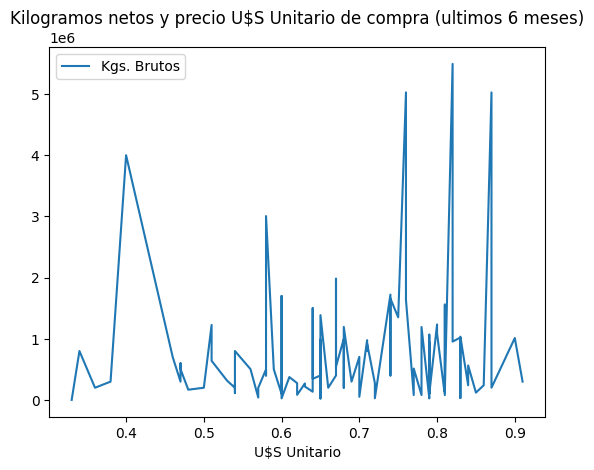

In [6]:
df_new_filtered = df_new_filtered.sort_values(
    'U$S Unitario', ascending=False)

df_new_filtered.plot.line(x="U$S Unitario", y="Kgs. Brutos",
                          title="Kilogramos netos y precio U$S Unitario de compra (ultimos 6 meses)")

df_new_filtered = df_new_filtered.sort_values(
    'Kgs. Brutos', ascending=False)


## Parte 2

#### Desglose por compañia de las importaciones de los ultimos 6 meses. Este incluye:

- Nombre de la compañia
- Cantidad de importaciones
- Proveedores, y cantidad de importaciones por proveedor
- Precio promedio de compra por unidad en los ultimos 6 meses
- Volumen total neto de compra en los ultimos 6 meses
- Detalles de la ultima compra realizada


In [9]:
# FX DEVUELVE DETALLES DE IMPORTADOR

def analisis_origenes_brasil():
    global registro_volumen
    global volumenTotalImportacionTn

    registro_volumen = {
        "NCM/NANDINA/SACH": [],
        "Pais": [],
        "No. Importaciones": [],
        "Volumen Total Bruto (Tn)": [],
        "Participacion en Vol. Total": [],
        "Puertos": []
    }

    volumenTotalImportacionTn = (
        df_new_filtered['Kgs. Brutos'].sum()/1000).round(2)

    for pais in df_new_filtered['País de Origen'].unique():

        data = df_new_filtered[df_new_filtered['País de Origen'] == f"{pais}"]
        volumenTotalCompania = (data['Kgs. Brutos'].sum()/1000).round(2)

        registro_volumen['NCM/NANDINA/SACH'].append(283525)
        registro_volumen['Pais'].append(pais)
        registro_volumen['No. Importaciones'].append(len(data))
        registro_volumen['Volumen Total Bruto (Tn)'].append(
            (data['Kgs. Brutos'].sum()/1000).round(2))
        registro_volumen['Participacion en Vol. Total'].append(
            f"{round(( volumenTotalCompania / volumenTotalImportacionTn) *100)}%")
        registro_volumen['Puertos'].append(
            ', '.join(data['Puerto'].value_counts().to_dict()))


analisis_origenes_brasil()

excel_new_data = pd.DataFrame.from_records(
    registro_volumen).sort_values('Volumen Total Bruto (Tn)', ascending=False).reset_index(drop=True)

excel_new_data = excel_new_data[['NCM/NANDINA/SACH', 'Pais',
                                 'Volumen Total Bruto (Tn)', 'No. Importaciones', "Participacion en Vol. Total", "Puertos"]]

excel_new_data


,NCM/NANDINA/SACH,Pais,Volumen Total Bruto (Tn),No. Importaciones,Participacion en Vol. Total,Puertos
0,283525,Perú,25339.45,30,33%,"RIO DE JANEIRO, SAO FRANCISCO DO SUL, ASSIS BR..."
1,283525,China,22854.75,40,29%,"SAO FRANCISCO DO SUL, SANTOS, PARANAGUA, IMBIT..."
2,283525,Marruecos,15536.31,3,20%,"PARANAGUA, 0000"
3,283525,Túnez,8485.00,10,11%,"ITAJAI, RIO GRANDE"
4,283525,España,5196.00,15,7%,"ITAJAI, RIO GRANDE, PARANAGUA, SANTOS"
5,283525,Turquía,240.00,1,0%,SANTOS
6,283525,Alemania,1.00,1,0%,RIO DE JANEIRO - AEROPORT


In [10]:
import os
import json
import gspread as gs

CURRENT_WD = os.getcwd()
COUNTRY_WD = (os.path.basename(CURRENT_WD).split('/')[-1]).upper()
CREDENTIALS = '../credentials.json'

# gc = gs.oauth(credentials_filename=CREDENTIALS)
gc = gs.service_account(filename='../service-credentials.json')

sh = gc.open('Brasil2022')

worksheet_list = sh.worksheets()

print(
    f"\033[1m> Las hojas del excel actualmente son:\033[0m\n {worksheet_list}\n- - - - - - - - - -\n")

# try:
#     ws = sh.worksheet(f'{COUNTRY_WD}')
#     # Code if spreadsheet exists:
#     print("Spreadsheet exists: Modifying existing working sheet...\n- - - - - - - - - -\n")
#     # ws.clear()
#     df_values = excel_new_data.values.tolist()
#     sh.values_append(f'{COUNTRY_WD}', {'valueInputOption': 'RAW'}, {
#                      'values': df_values})
#     print("> Spreadsheet modified.\n- - - - - - - - - -\n")
# except gs.exceptions.WorksheetNotFound:
#     # Code if spreadsheet doesn't exist:
#     print("Spreadsheet doesn't exist: Creating the new worksheet...\n- - - - - - - - - -\n")
#     sh.add_worksheet(title=f"{COUNTRY_WD}", rows=100, cols=20)
#     ws = sh.worksheet(f'{COUNTRY_WD}')
#     ws.update([excel_new_data.columns.values.tolist()] +
#               excel_new_data.values.tolist())
#     print("> Spreadsheet created.\n- - - - - - - - - -\n")


> Las hojas del excel actualmente son:
 [<Worksheet 'Hoja 1' id:0>]
- - - - - - - - - -

Spreadsheet doesn't exist: Creating the new worksheet...
- - - - - - - - - -

> Spreadsheet created.
- - - - - - - - - -

